<a href="https://colab.research.google.com/github/garestrear/poligonal_clusterization/blob/master/kmeans_vs_hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explicación del código
Se realiza clusterización de la base de datos por dos métodos diferentes: 1) Usando kmeans, 2) Usando hierachical clustering. Distancia euclidea en ambos casos

Para la comparación se escoge una curva aleatoria y se despliega el cluster que la contiene en ambos casos.
Información adicional:
Se dispone de alrededor de **40000** de estas secuencias de puntos y cada secuencia consta de 15 puntos (en $\mathbb{R}^2$ o en $\mathbb{C}$).

Sobre estas poligonales se sabe lo siguiente:

*   Poseen propiedades "deseables" para ser usadas en el ajuste de curvas, por ejemplo permiten la  instalación de una malla ortogonal sobre regiones "irregulares".
*   Presentan características similares (concavidad, longitud, distribución de puntos,...)
*   Puntos aproximadamente equiespaciados (en la mayoría de los casos)
*   Los puntos se encentran almacenados en una matriz compleja $ 40000\times 15$
* Son curvas simples

Algunas necesidas de clusterizar estas poligonales:

*   Se realizan procesos de comparación de segmentos de curva con las poligonales, ¡muchos!. Lo cual es costoso e ineficiente.
*   Detección de outliers en la base de datos de poligonales
*   Necesidad de conocer a fondo la base de datos de poligonales para implemntar mejoras.













##  Librerías

In [ ]:
# Cargamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances, silhouette_samples, silhouette_score
import scipy.io as spio
import scipy.cluster.hierarchy as sch
import pylab as pl
import pandas as pd


In [ ]:
# Cargamos los datos. El archivo "DataBase.mat" contiene una matriz compleja,
# cada fila es una secuencia de puntos conteniendo lso vértices de las poligonales
mat = spio.loadmat('DataBase.mat', squeeze_me=True)
a = mat['DataBase'] # array
#type(a)
X_numpy = np.array(a, dtype = np.complex)

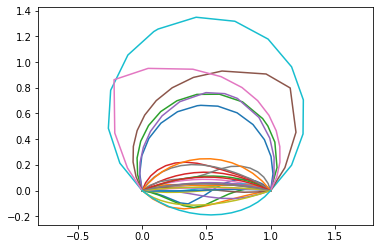

In [ ]:
# Pintamos algunas de esas poligonales
N_curvas2paint=30;
a=np.random.randint(0,len(X_numpy), N_curvas2paint)
b=np.sort(a)
#print(b)
X=X_numpy.real
Y=X_numpy.imag
for k in b:
  plt.plot(X[k,0:15],Y[k,0:15])
  plt.axis('equal')

#plt.margins(x=-0.4,y=-0)

# Kmeans clusterization

In [ ]:
# Clusterización con kmeans
cluster_number = 150
kmeans_model = KMeans(n_clusters = cluster_number)
# Pasamos de C15 a R30
X_numpy_r30=np.concatenate((X_numpy.real, X_numpy.imag),axis=1)
kmeans_model.fit(X_numpy_r30)
centroides=kmeans_model.cluster_centers_
y_km=kmeans_model.fit_predict(X_numpy_r30)
labels = kmeans_model.labels_
kmeans_Silhuette_coefficient=metrics.silhouette_score(X_numpy_r30, labels, metric='euclidean')
# El anterior número da cuenta de la calidad de la clusterización


# Hierarchical clusterization

In [ ]:
# Clusterización Jerarquica aglomerante
hc = AgglomerativeClustering(n_clusters = cluster_number, 
                    affinity = 'euclidean', 
                    linkage = 'ward')
y_hc = hc.fit_predict(X_numpy_r30) # Contiene el indice de clasificación de cada poligonal
labels2=hc.labels_
hierchachical_Silhuette_coefficient=metrics.silhouette_score(X_numpy_r30,labels2,metric='euclidean')
# El anterior número da cuenta de la calidad de la clusterización

# Clusterization comparisons. 
Se escogen 4 poligonales aleatorias, luego para cada poligonal se pinta todo el cluster que las contiene (En los dos tipos de clusterización).


## Cluster comparison 1

Text(0.5, 1.0, "['Cluster hc', 1025]")

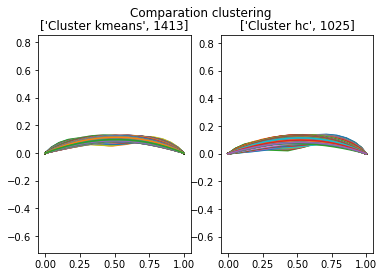

In [ ]:
# Escogemos cuatro poligonales aleatorias
ind=np.sort(np.random.randint(0,len(X_numpy_r30),4)) # Indices de las poligonales

# Cluster con kmeans conteniendo la primera poligonal aleatoria
C0x_km=X[y_km==y_km[ind[0]]]
C0y_km=Y[y_km==y_km[ind[0]]]
# Cluster con HC conteniendo la primera poligonal aleatoria
C0x_hc=X[y_hc==y_hc[ind[0]]]
C0y_hc=Y[y_hc==y_hc[ind[0]]]
# Pintamos
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparation clustering')
ax1.axis('equal')
ax1.plot(np.transpose(C0x_km),np.transpose(C0y_km))
ax1.set_title(['Cluster kmeans',len(C0x_km)])
ax2.axis('equal')
ax2.plot(np.transpose(C0x_hc),np.transpose(C0y_hc))
ax2.set_title(['Cluster hc',len(C0x_hc)])


## Cluster compatrison 2.

Text(0.5, 1.0, "['Cluster hc', 1116]")

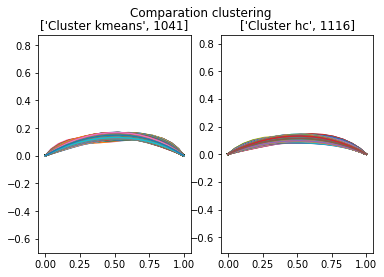

In [ ]:
# Cluster con kmeans conteniendo la primera poligonal aleatoria
C0x_km=X[y_km==y_km[ind[1]]]
C0y_km=Y[y_km==y_km[ind[1]]]
# Cluster con HC conteniendo la primera poligonal aleatoria
C0x_hc=X[y_hc==y_hc[ind[1]]]
C0y_hc=Y[y_hc==y_hc[ind[1]]]
# Pintamos
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparation clustering')
ax1.axis('equal')
ax1.plot(np.transpose(C0x_km),np.transpose(C0y_km))
ax1.set_title(['Cluster kmeans',len(C0x_km)])
ax2.axis('equal')
ax2.plot(np.transpose(C0x_hc),np.transpose(C0y_hc))
ax2.set_title(['Cluster hc',len(C0x_hc)])

## Cluster comparison 3

Text(0.5, 1.0, "['Cluster hc', 200]")

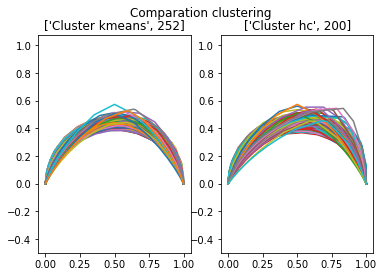

In [ ]:
# Cluster con kmeans conteniendo la primera poligonal aleatoria
C0x_km=X[y_km==y_km[ind[2]]]
C0y_km=Y[y_km==y_km[ind[2]]]
# Cluster con HC contenizndo la primera poligonal aleatoria
C0x_hc=X[y_hc==y_hc[ind[2]]]
C0y_hc=Y[y_hc==y_hc[ind[2]]]
# Pintamos
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparation clustering')
ax1.axis('equal')
ax1.plot(np.transpose(C0x_km),np.transpose(C0y_km))
ax1.set_title(['Cluster kmeans',len(C0x_km)])
ax2.axis('equal')
ax2.plot(np.transpose(C0x_hc),np.transpose(C0y_hc))
ax2.set_title(['Cluster hc',len(C0x_hc)])

## Cluster comparison 4

Text(0.5, 1.0, "['Cluster hc', 686]")

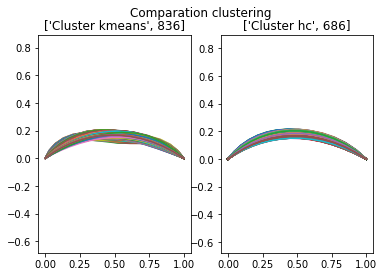

In [ ]:
# Cluster con kmeans conteniendo la primera poligonal aleatoria
C0x_km=X[y_km==y_km[ind[3]]]
C0y_km=Y[y_km==y_km[ind[3]]]
# Cluster con HC conteniendo la primera poligonal aleatoria
C0x_hc=X[y_hc==y_hc[ind[3]]]
C0y_hc=Y[y_hc==y_hc[ind[3]]]
# Pintamos
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparation clustering')
ax1.axis('equal')
ax1.plot(np.transpose(C0x_km),np.transpose(C0y_km))
ax1.set_title(['Cluster kmeans',len(C0x_km)])
ax2.axis('equal')
ax2.plot(np.transpose(C0x_hc),np.transpose(C0y_hc))
ax2.set_title(['Cluster hc',len(C0x_hc)])

## **Cálculo de la cantidad de curvas en cada cluster**


In [ ]:
# Escogemos N_pol poligonales aleatorias
N_pol=1000
ind=np.sort(np.random.randint(0,len(X_numpy_r30),N_pol)) # Indices de las poligonales
Ncpckm=list() # número de curvas por cluster kmeans
Ncpchc=list() # número de curvas por cluster hc
for k in ind:
  # Cluster con kmeans conteniendo la primera poligonal aleatoria
  C0x_km=X[y_km==y_km[k]]
  #C0y_km=Y[y_km==y_km[k]]
  # Cluster con HC conteniendo la primera poligonal aleatoria
  C0x_hc=X[y_hc==y_hc[k]]
  #C0y_hc=Y[y_hc==y_hc[ind[0]]]
  Ncpckm.append(len(C0x_km))
  Ncpchc.append(len(C0x_hc))
print(Ncpckm)
print(Ncpchc)


[1839, 1041, 745, 321, 124, 735, 394, 182, 166, 175, 800, 158, 167, 167, 128, 303, 583, 1905, 750, 1905, 124, 321, 238, 394, 3239, 182, 800, 175, 158, 790, 228, 381, 381, 167, 126, 422, 422, 303, 1513, 192, 233, 192, 192, 192, 238, 1664, 175, 422, 422, 303, 303, 1905, 864, 3239, 735, 3239, 1041, 238, 238, 175, 175, 182, 800, 1839, 158, 158, 422, 128, 1905, 1513, 1905, 1413, 321, 1041, 234, 234, 175, 1839, 422, 393, 422, 228, 154, 167, 583, 1338, 1041, 790, 790, 735, 321, 182, 393, 393, 381, 228, 128, 750, 1905, 1338, 1513, 1839, 192, 3239, 233, 233, 790, 382, 790, 1839, 422, 167, 228, 422, 583, 583, 583, 864, 864, 1905, 836, 3239, 735, 192, 1413, 421, 421, 166, 321, 238, 233, 321, 234, 234, 1839, 182, 381, 381, 393, 3239, 393, 422, 228, 583, 352, 750, 750, 394, 233, 1413, 321, 1839, 790, 1664, 790, 321, 1839, 800, 3239, 393, 393, 393, 393, 422, 422, 864, 1905, 1513, 3239, 1513, 1338, 1905, 3239, 1413, 421, 1041, 3239, 735, 800, 800, 381, 422, 228, 393, 3239, 1338, 1338, 3239, 421, 394,

# Silhuette analisis
The Silhouette Coefficient is a measure of how well samples are clustered with samples that are similar to themselves. Clustering models with a high Silhouette Coefficient are said to be dense, where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.
Explicación:
Suponga que se ha realizado una clusterización sobre la base de datos.
El silhouette coeff. (sc_i) se calcula para cada poligonal. Así:
Suponga que tomamos la poligonal i-ésima y que está en el cluster #k (Ck)
Paso 1. Se halla el promedio de las distancias de la poligonal i, a todas las poligonales contenidas en el mismo cluster (cluster Ck). Este número se denota por (a_i), i= desde 1 hasta #poligonales.

Paso 2. Se halla la distancia promedio de la poligonal i a las poligonales del cluster Cj, con j diferente de k y luego se toma el mínimo de estas distancias promedios. Este número se denota (b_i)
Observaciones.
Se espera que b_i > a_i. Caso contrario la poligonalestá mal ubicada (Hay un cluster en el que encajaría mejor).
El silhuette coeff (sc_i), es: (b_i-a_i)/max(b_i,a_i).
El denominador max(b_i,a_i) es un factor de normalización.
El caso ideal sería: todos los cluster cumplen que la distancia entre dos de sus elementos es siempre cero y por tanto a_i=0 y la distancia entre elementos de clusters diferentes es siempre mayor que cero. En este caso sc_i=1.
El peor caso es cuando dos elementos iguales quedan en diferente cluster y por tanto b_i=0 pero la distancia entre elementos del mismo cluster no es cero así a_i>0. En este caso sc_i=-1.
Finalmente el silhuette coeff. (sc) de la clusterización es (b-a)/max(a,b) donde b es promedio de los b_i y a es el promedio de los a_i.


The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.



## Silhuette coefficient for each cluster


### Sihuette Kmeans coefficient

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 150')

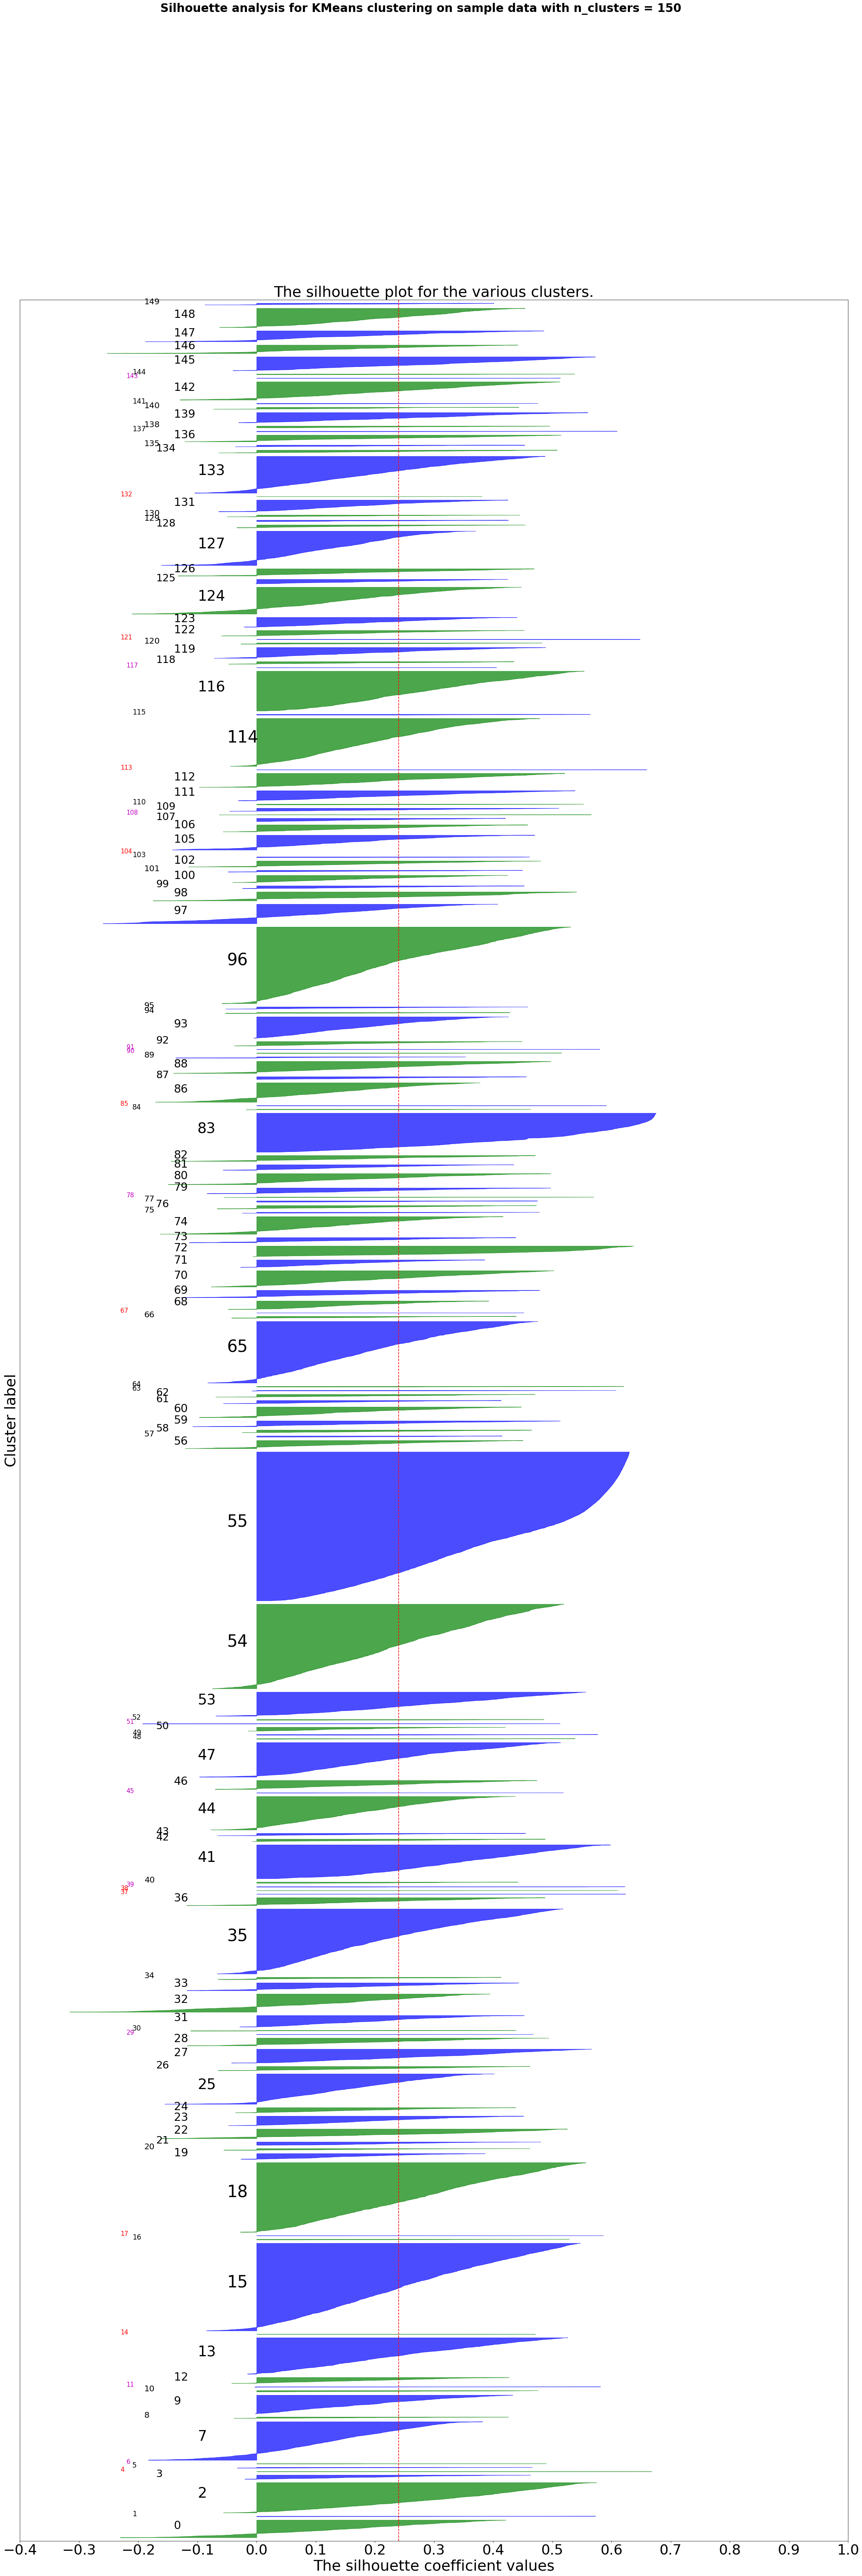

In [ ]:
# Arriba se calculó
# kmeans_Silhuette_coefficient=metrics.silhouette_score(X_numpy_r30, labels, metric='euclidean')
# El anterior número da cuenta de la calidad de la clusterización
silhouette_avg=kmeans_Silhuette_coefficient

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_numpy_r30, labels)
#print(sample_silhouette_values)
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(36, 100)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
ax1.set_xlim([-0.4, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
space_cluster=75
ax1.set_ylim([0, len(X_numpy) + (cluster_number + 1) * space_cluster])
y_lower = space_cluster
color_option=['green', 'blue']
for i in range(cluster_number):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
      sample_silhouette_values[labels == i]
    
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
  
    #color = cm.nipy_spectral(float(i) / cluster_number)  #Colormap type
    color=color_option[i % 2]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    if size_cluster_i < 5:
      ax1.text(-0.23, y_lower + 0.5 * size_cluster_i, str(i),size=15,color='red')
    elif size_cluster_i < 10:
      ax1.text(-0.22, y_lower + 0.5 * size_cluster_i, str(i),size=15,color='m')
    elif size_cluster_i < 20:
      ax1.text(-0.21, y_lower + 0.5 * size_cluster_i, str(i),size=17)
    elif size_cluster_i < 50:
      ax1.text(-0.19, y_lower + 0.5 * size_cluster_i, str(i),size=20)
    elif size_cluster_i < 100:
      ax1.text(-0.17, y_lower + 0.5 * size_cluster_i, str(i),size=25)
    elif size_cluster_i < 500:
      ax1.text(-0.14, y_lower + 0.5 * size_cluster_i, str(i),size=27)
    elif size_cluster_i < 1000:
      ax1.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i),size=35)
    else:
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),size=40)

    # Compute the new y_lower for next plot
    y_lower = y_upper + space_cluster  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.",fontsize=36)
ax1.set_xlabel("The silhouette coefficient values",fontsize=36)
ax1.set_ylabel("Cluster label",fontsize=36)

    # The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.4,-0.3,-0.2,-0.1, 0, 0.1,0.2, 0.3,0.4,0.5, 0.6, 0.7,0.8,\
                    0.9, 1])
#plt.xticks(fontsize=16)
plt.xticks(fontsize=34)
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
               "with n_clusters = %d" % cluster_number),
              fontsize=28, fontweight='bold')

 #plt.show()
   


In [ ]:
color
  color_option=['green', 'blue']
  i=35
  i % 2
  color_option[ i % 2]
color_option[0]

IndentationError: ignored

### Silhuette hierachical coefficients

In [ ]:
# Arriba se calculó
# hierchachical_Silhuette_coefficient=metrics.silhouette_score(X_numpy_r30, labels, metric='euclidean')
# El anterior número da cuenta de la calidad de la clusterización
silhouette_avg=hierchachical_Silhuette_coefficient
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_numpy_r30, labels2)
#print(sample_silhouette_values)
#fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(36, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
#ax1.set_xlim([-0.1, 1])
plt.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (cluster_number + 1) * 10])
y_lower = 10
for i in range(cluster_number):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
      sample_silhouette_values[labels == i]
    
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / cluster_number)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % cluster_number),
                 fontsize=14, fontweight='bold')

## Cálculo de coeficiente de compacidad
*mean intra-cluster distance (a)*
Para cada curva, calcularemos el coeficiente ai, el cual es el promedio de las distancias a todos los elementos del cluster que la contiene


### kmeans, mean intra-cluster distance (a) for each sample


In [ ]:
# Ingredientes
## labels  --> Contiene los indices de la clusterización, labels es un arreglo 
#              con la misma cantidad de elementos que poligonales. Cada entrada k de labels dice 
#              el indice del cluster al que pertenece la poligonal número k.
## X_numpy --> las poligonales en forma compleja
silhuette_a=[]
for i in range(len(X_numpy)):
  cpoli=X_numpy[i,:]   # tomo una curva
  label_cpoli=labels[i]      # miro a que cluster pertenece
  aux=labels==label_cpoli    # Guardo los indices de las curvas que están en el mismo cluster
  aux[i]=False               # quito el indice de cpoli
  cluster_cpoli=X_numpy[aux,:] # Tomo el cluster que contiene a la poligonal
  # Usamos la función que calcula distancias de una poligonal a una matriz de poligonales
  [mean_distai,min_distai]=dist_pol(cpoli, MatPol)
  #almacenamos estos coeficientes
  silhuette_a.append(mean_distai)



[0.8203004735674639,
 0.794813885039962,
 0.7745620232662643,
 0.7593426255926947,
 0.7490235556443381,
 0.7435185082157644,
 0.7427935520067935,
 0.7468683362769168,
 0.7558251456927467,
 0.7698255824946717,
 0.7891392632779124,
 0.8141764843526714,
 0.8455373288677672,
 0.8841195105588654,
 0.9314846471348895,
 0.9908098568545415,
 1.0695824744855122,
 1.1933966598389343,
 1.306708913721853,
 1.1585618432013065,
 1.1391958768740087,
 1.11363216307734,
 1.102159505661099,
 1.076119809293874,
 1.0682405506990875,
 1.0318820574603107,
 1.015369957215304,
 0.9948558945430402,
 0.9658998890512044,
 0.9499720639483646,
 0.9425288429714418,
 0.9138670244162254,
 0.9002836890647105,
 0.894491223162397,
 0.8962952396673014,
 0.8919715790378796,
 0.893788275960448,
 0.9038654248399728,
 0.8203088037827573,
 0.7948576947643052,
 0.7746850208514666,
 0.7596039301875575,
 0.7495005407273423,
 0.7443128716161209,
 0.7440375240121424,
 0.7487388646532629,
 0.7585641444975559,
 0.7737717634838249,
 

#### Gráfico de comparación silhuette (a)

Text(0.5, 0.98, 'a-Silhouette analysis for KMeans clustering on sample data with n_clusters = 150')

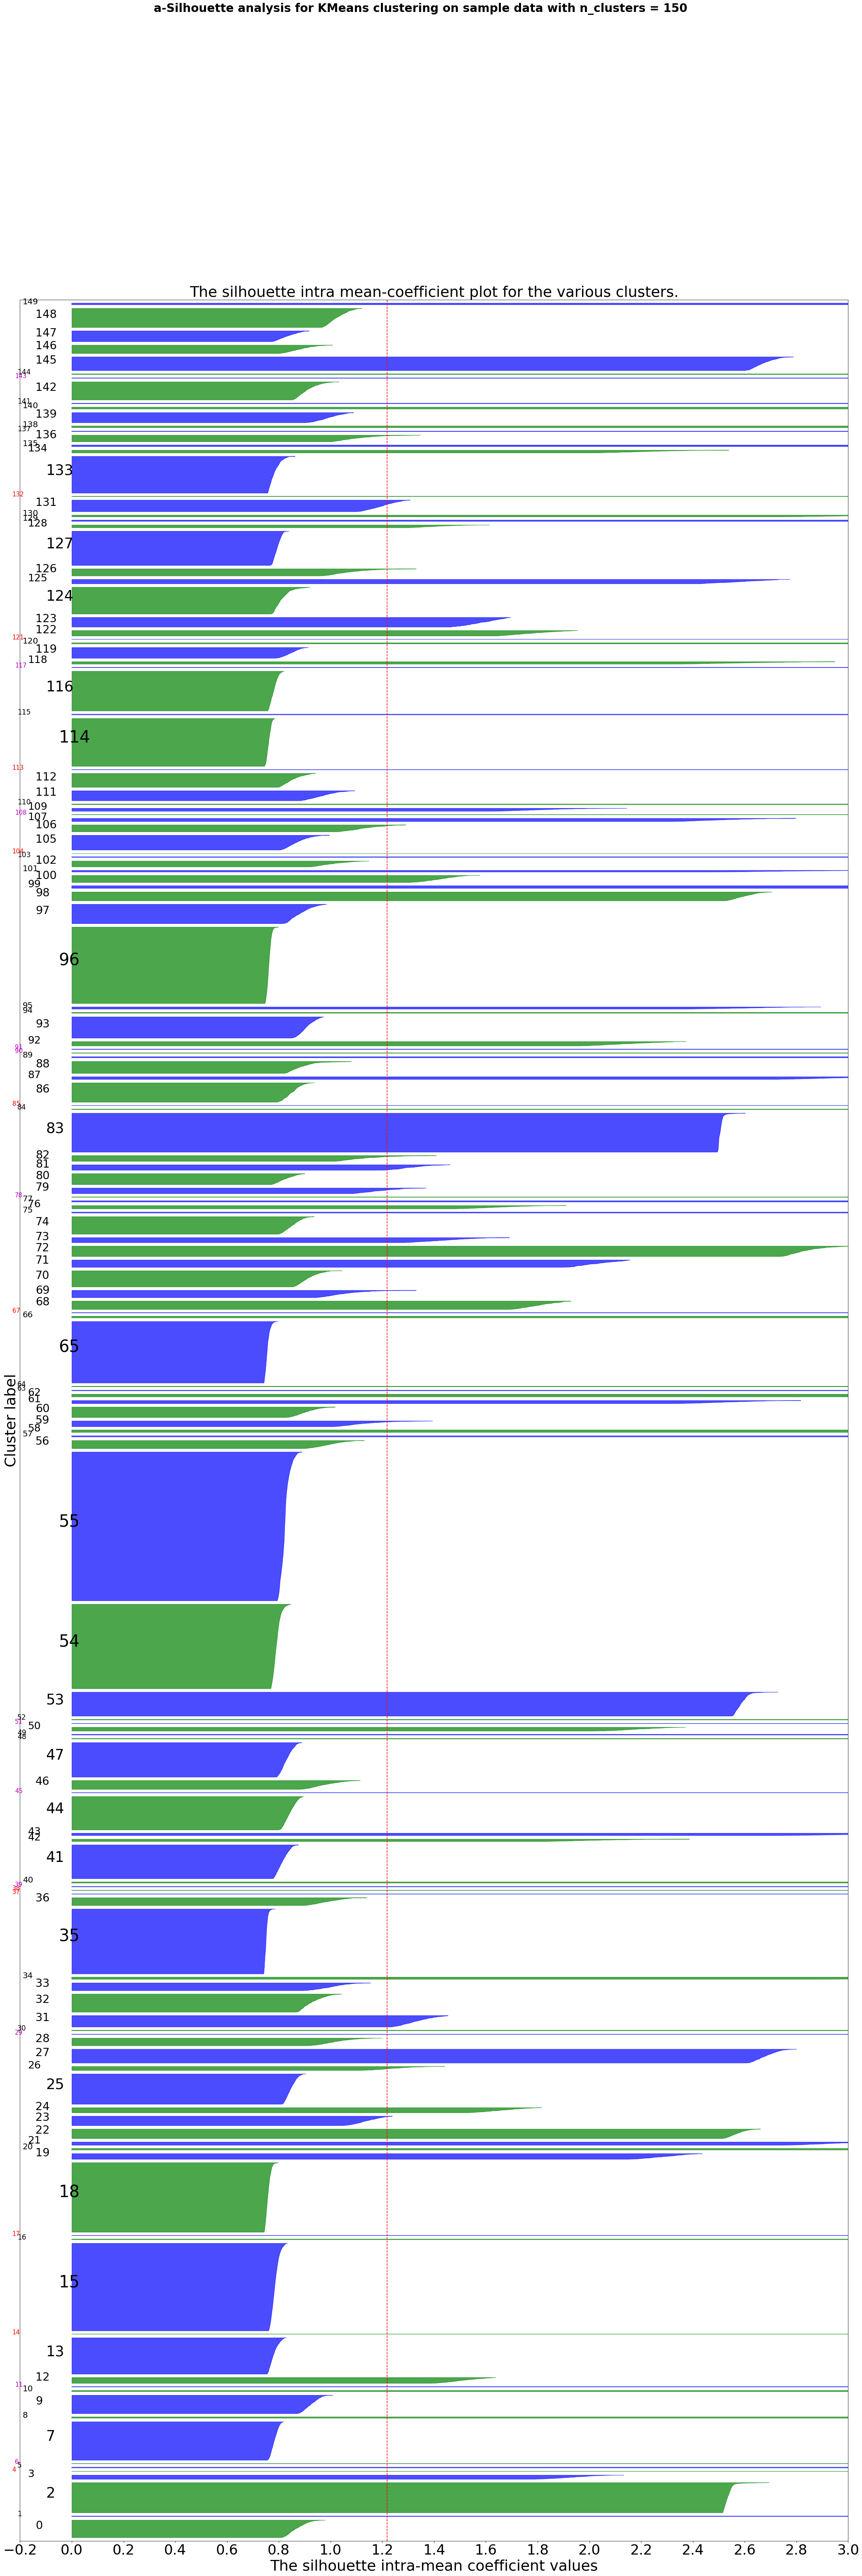

In [ ]:
#print(sample_silhouette_values)
sample_silhouette_values_a = np.asarray(silhuette_a)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(36, 100)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
ax1.set_xlim([-0.2, 3])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
space_cluster=75
ax1.set_ylim([0, len(X_numpy) + (cluster_number + 1) * space_cluster])
y_lower = space_cluster
color_option=['green', 'blue'] 
for i in range(cluster_number):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values_a = \
      sample_silhouette_values_a[labels == i]
    
    ith_cluster_silhouette_values_a.sort()

    size_cluster_i = ith_cluster_silhouette_values_a.shape[0]
    y_upper = y_lower + size_cluster_i
    
  
    #color = cm.nipy_spectral(float(i) / cluster_number)  #Colormap type
    color=color_option[i % 2]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values_a,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    if size_cluster_i < 5:
      ax1.text(-0.23, y_lower + 0.5 * size_cluster_i, str(i),size=15,color='red')
    elif size_cluster_i < 10:
      ax1.text(-0.22, y_lower + 0.5 * size_cluster_i, str(i),size=15,color='m')
    elif size_cluster_i < 20:
      ax1.text(-0.21, y_lower + 0.5 * size_cluster_i, str(i),size=17)
    elif size_cluster_i < 50:
      ax1.text(-0.19, y_lower + 0.5 * size_cluster_i, str(i),size=20)
    elif size_cluster_i < 100:
      ax1.text(-0.17, y_lower + 0.5 * size_cluster_i, str(i),size=25)
    elif size_cluster_i < 500:
      ax1.text(-0.14, y_lower + 0.5 * size_cluster_i, str(i),size=27)
    elif size_cluster_i < 1000:
      ax1.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i),size=35)
    else:
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),size=40)

    # Compute the new y_lower for next plot
    y_lower = y_upper + space_cluster  # 10 for the 0 samples

ax1.set_title("The silhouette intra mean-coefficient plot for the various clusters.",fontsize=36)
ax1.set_xlabel("The silhouette intra-mean coefficient values",fontsize=36)
ax1.set_ylabel("Cluster label",fontsize=36)
silhouette_avg_a=np.mean(sample_silhouette_values_a)
    # The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg_a, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.2, 0, 0.2,0.4, 0.6,0.8,1, 1.2, 1.4,1.6,1.8,\
                    2, 2.2,2.4,2.6,2.8,3])
#plt.xticks(fontsize=16)
plt.xticks(fontsize=34)
plt.suptitle(("a-Silhouette analysis for KMeans clustering on sample data "
               "with n_clusters = %d" % cluster_number),
              fontsize=28, fontweight='bold')

## Cálculo del coeficiente de separación de clusters
*mean nearest-cluster distance (b)* 
Para cada poligonal buscaremos la distancia de esa poligonal a cada una de las curvas de los otros cluster (en los que no están contenidas). Entre mas grande sea este valos mejor es la clusterización.

### kmeans, mean nearest-cluster distance (b) for each sample

In [ ]:
# Ingredientes
## labels  --> Contiene los indices de la clusterización, labels es un arreglo 
#              con la misma cantidad de elementos que poligonales. Cada entrada k de labels dice 
#              el indice del cluster al que pertenece la poligonal número k.
## X_numpy --> las poligonales en forma compleja

# Parte 1, agrupacón de clusters
clusters_pack = [X_numpy[labels==i] for i in range(cluster_number)]

silhuette_b=[]
for i in range(len(X_numpy)):
  cpoli=X_numpy[i,:]   # tomo una curva
  label_cpoli=labels[i]      # miro a que cluster pertenece
  silhuette_aux_b=[]
  for k in range(cluster_number):
    if k!=label_cpoli:
      clusterk=clusters_pack[k]
      (mean_distk,min_distk)=dist_pol(cpoli, clusterk)
      silhuette_aux_b.append(mean_distk)

  
  silhuette_b.append(min(silhuette_aux_b))



#### Gráfico de comparación silhueete (b)

Text(0.5, 0.98, 'b-Silhouette analysis for KMeans clustering on sample data with n_clusters = 150')

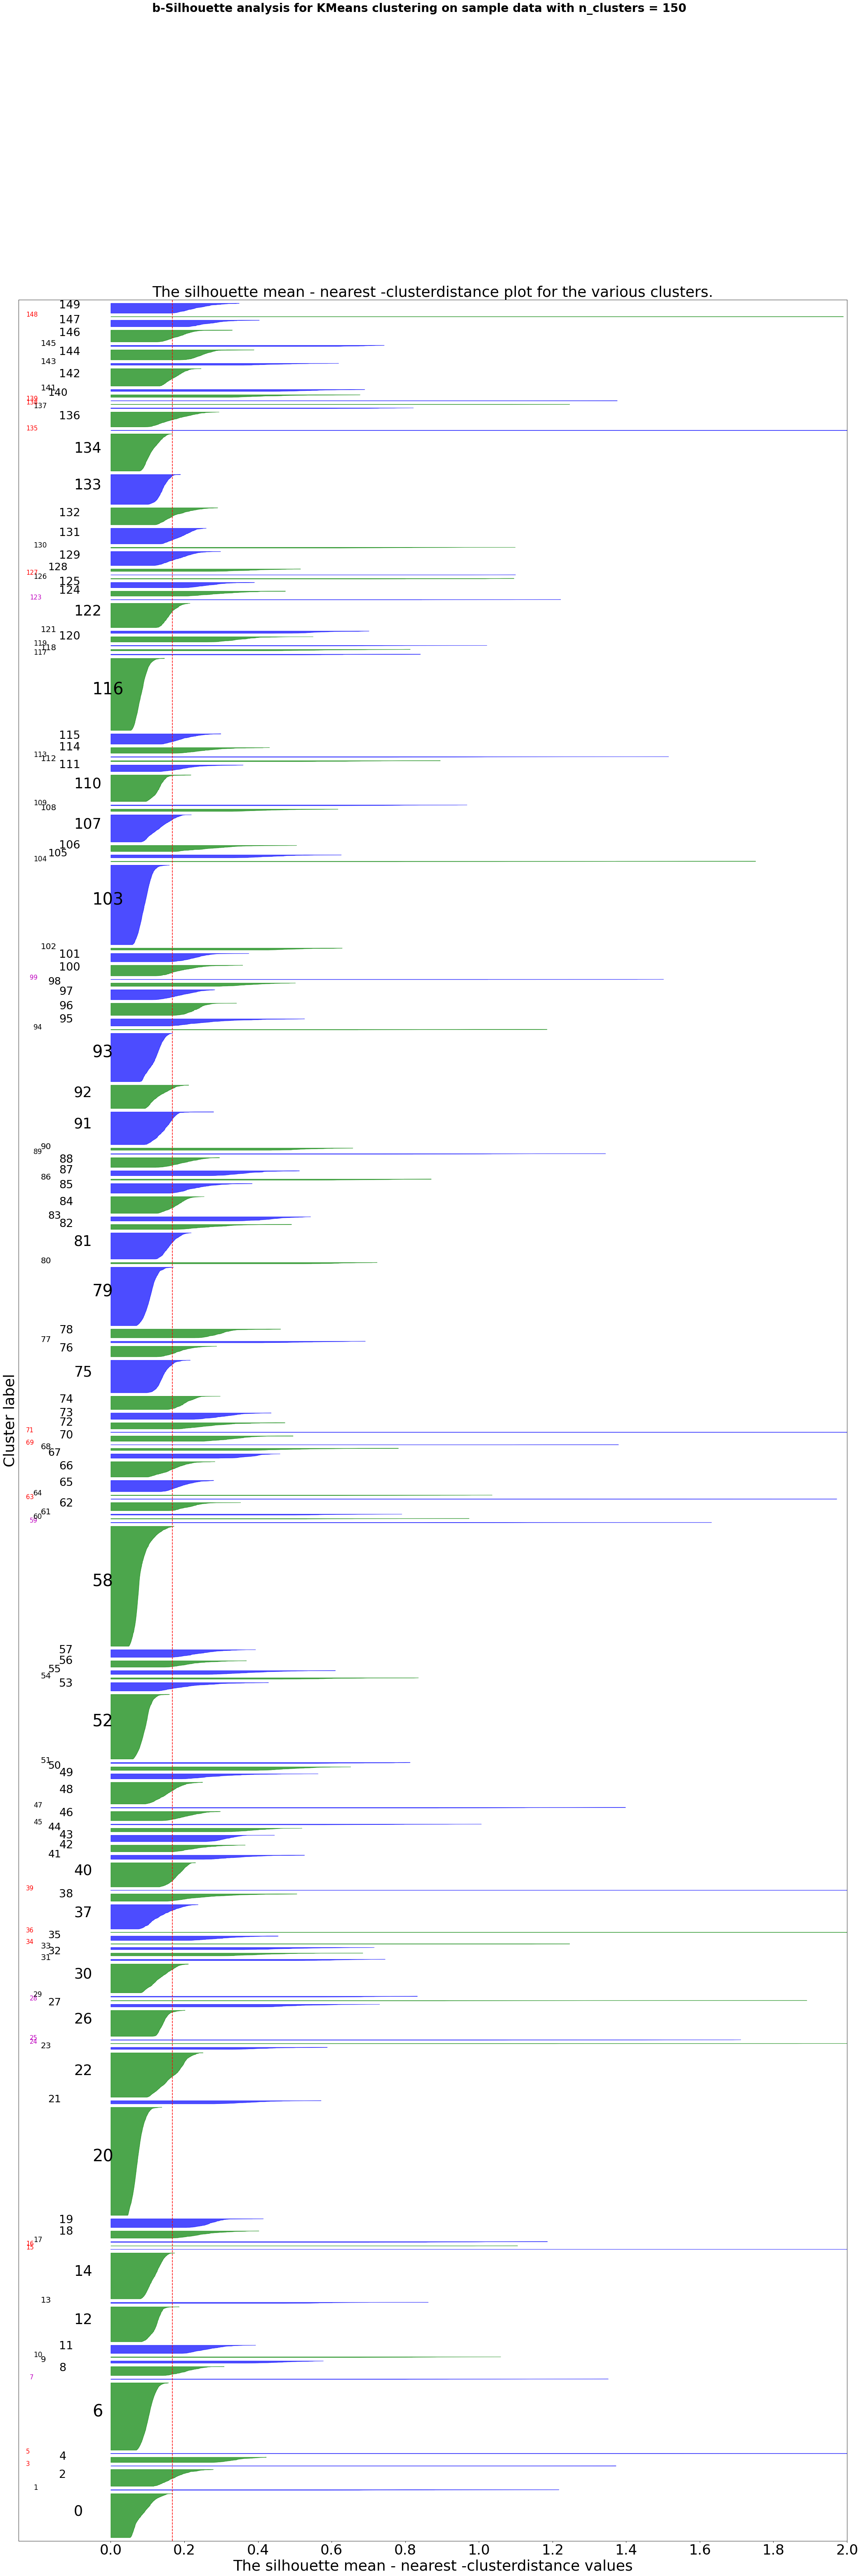

In [ ]:
#print(sample_silhouette_values)
sample_silhouette_values_b = np.asarray(silhuette_b)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(36, 100)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
ax1.set_xlim([-0.25, 2])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
space_cluster=75
ax1.set_ylim([0, len(X_numpy) + (cluster_number + 1) * space_cluster])
y_lower = space_cluster
color_option=['green', 'blue'] 
for i in range(cluster_number):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values_b = \
      sample_silhouette_values_b[labels == i]
    
    ith_cluster_silhouette_values_b.sort()

    size_cluster_i = ith_cluster_silhouette_values_b.shape[0]
    y_upper = y_lower + size_cluster_i
    
  
    #color = cm.nipy_spectral(float(i) / cluster_number)  #Colormap type
    color=color_option[i % 2]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values_b,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    if size_cluster_i < 5:
      ax1.text(-0.23, y_lower + 0.5 * size_cluster_i, str(i),size=15,color='red')
    elif size_cluster_i < 10:
      ax1.text(-0.22, y_lower + 0.5 * size_cluster_i, str(i),size=15,color='m')
    elif size_cluster_i < 20:
      ax1.text(-0.21, y_lower + 0.5 * size_cluster_i, str(i),size=17)
    elif size_cluster_i < 50:
      ax1.text(-0.19, y_lower + 0.5 * size_cluster_i, str(i),size=20)
    elif size_cluster_i < 100:
      ax1.text(-0.17, y_lower + 0.5 * size_cluster_i, str(i),size=25)
    elif size_cluster_i < 500:
      ax1.text(-0.14, y_lower + 0.5 * size_cluster_i, str(i),size=27)
    elif size_cluster_i < 1000:
      ax1.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i),size=35)
    else:
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),size=40)

    # Compute the new y_lower for next plot
    y_lower = y_upper + space_cluster  # 10 for the 0 samples

ax1.set_title("The silhouette mean - nearest -clusterdistance plot for the various clusters.",fontsize=36)
ax1.set_xlabel("The silhouette mean - nearest -clusterdistance values",fontsize=36)
ax1.set_ylabel("Cluster label",fontsize=36)
silhouette_avg_b=np.mean(sample_silhouette_values_b)
    # The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg_b, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
#ax1.set_xticks([ 0, 0.5,1, 1.5,2,2.5, 3, 3.5,4,4.5, 5])
#ax1.set_xticks([ 0, 0.2,0.4, 0.6,0.8,1, 1.2, 1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3])
ax1.set_xticks([ 0, 0.2,0.4, 0.6,0.8,1, 1.2, 1.4,1.6,1.8,2])

#plt.xticks(fontsize=16)
plt.xticks(fontsize=34)
plt.suptitle(("b-Silhouette analysis for KMeans clustering on sample data "
               "with n_clusters = %d" % cluster_number),
              fontsize=28, fontweight='bold')

# Funciones creadas para el análisis

## Función distancia de una poligonal a una matriz de poligonales

In [ ]:
def dist_pol(cpol1, MatPol):
    '''# Esta función calcula la distancia entre una poligonal y una matriz de poligonales
    úsela así [mean_dist, dist]=dist_pol(cpol1,MatPol) y obtenga la distancia promedio de 
    la poligonal a las demás poligonales del cluster y la distancia mínima '''
    r=MatPol-cpol1
    d2=np.apply_along_axis(np.linalg.norm,1,r)
    dist=min(d2)
    mean_dist=np.mean(d2)
    return mean_dist, dist

## Función que pinta un cluster completo

In [ ]:
# tenga en cuenta que 
# clusters_pack = [X_numpy[labels==i] for i in range(cluster_number)]
def paint_cluster(ncluster,clusters_pack):
  # Use esta función así paint_cluster(ncluster,clusters_pack)
  # recuerde que para obtener clusters_pack use
  # clusters_pack= [X_numpy[labels==i] for i in range(cluster_number)]
  X_numpy_C=clusters_pack[ncluster]
  X=X_numpy_C.real
  Y=X_numpy_C.imag
  # Pintamos
  fig, 
  plt.axis('equal')
  plt.plot(np.transpose(X),np.transpose(Y))
  plt.suptitle(("Cluster número %d " % ncluster),fontsize=28, fontweight='bold')


<function matplotlib.pyplot.show>